# Support Vector Machine Template for Credit Card Applications

In [1]:
import os
import pandas as pd
import warnings
warnings.filterwarnings("ignore")
credit_X_df = pd.read_csv(r'D:\MATH 5671\Group 7\Assignment 5\training_features.csv',header =0)
credit_X_df.head()

,checkin_acc,duration,credit_history,purpose,amount,saving_acc,present_emp_since,inst_rate,personal_status,other_debtors,residing_since,property,age,inst_plans,housing,num_credits,job,dependents,telephone,foreign_worker
0,A12,24,A34,A410,11938,A61,A73,2,A93,A102,3,A123,39,A143,A152,2,A174,2,A192,A201
1,A14,36,A32,A46,1819,A61,A73,4,A93,A101,4,A124,37,A142,A153,1,A173,1,A192,A201
2,A11,15,A34,A42,1478,A61,A75,4,A93,A101,4,A123,44,A143,A152,2,A173,2,A192,A201
3,A14,24,A34,A43,1516,A64,A73,4,A92,A101,1,A121,43,A143,A152,2,A172,1,A191,A201
4,A11,9,A32,A42,2136,A61,A73,3,A93,A101,2,A121,25,A143,A152,1,A173,1,A191,A201


In [5]:
import matplotlib.pyplot as plt 
import pandas as pd
import numpy as np

credit_y_df = pd.read_csv(r'D:\MATH 5671\Group 7\Assignment 5\training_labels.csv',header =0)

# target variable distribution
credit_y_df.groupby(['status'])[['status']].count()

,status
status,
-1,214
1,486


It can be seen that the class distribution is unbalanced

In [6]:
credit_all_df = pd.concat([credit_X_df.reset_index(drop=True), credit_y_df], axis=1) 
credit_all_df.head()

,checkin_acc,duration,credit_history,purpose,amount,saving_acc,present_emp_since,inst_rate,personal_status,other_debtors,...,property,age,inst_plans,housing,num_credits,job,dependents,telephone,foreign_worker,status
0,A12,24,A34,A410,11938,A61,A73,2,A93,A102,...,A123,39,A143,A152,2,A174,2,A192,A201,-1
1,A14,36,A32,A46,1819,A61,A73,4,A93,A101,...,A124,37,A142,A153,1,A173,1,A192,A201,-1
2,A11,15,A34,A42,1478,A61,A75,4,A93,A101,...,A123,44,A143,A152,2,A173,2,A192,A201,1
3,A14,24,A34,A43,1516,A64,A73,4,A92,A101,...,A121,43,A143,A152,2,A172,1,A191,A201,1
4,A11,9,A32,A42,2136,A61,A73,3,A93,A101,...,A121,25,A143,A152,1,A173,1,A191,A201,1


## Data Exploration
Exploring the dataset using plots, histograms, descriptive statistics, etc.

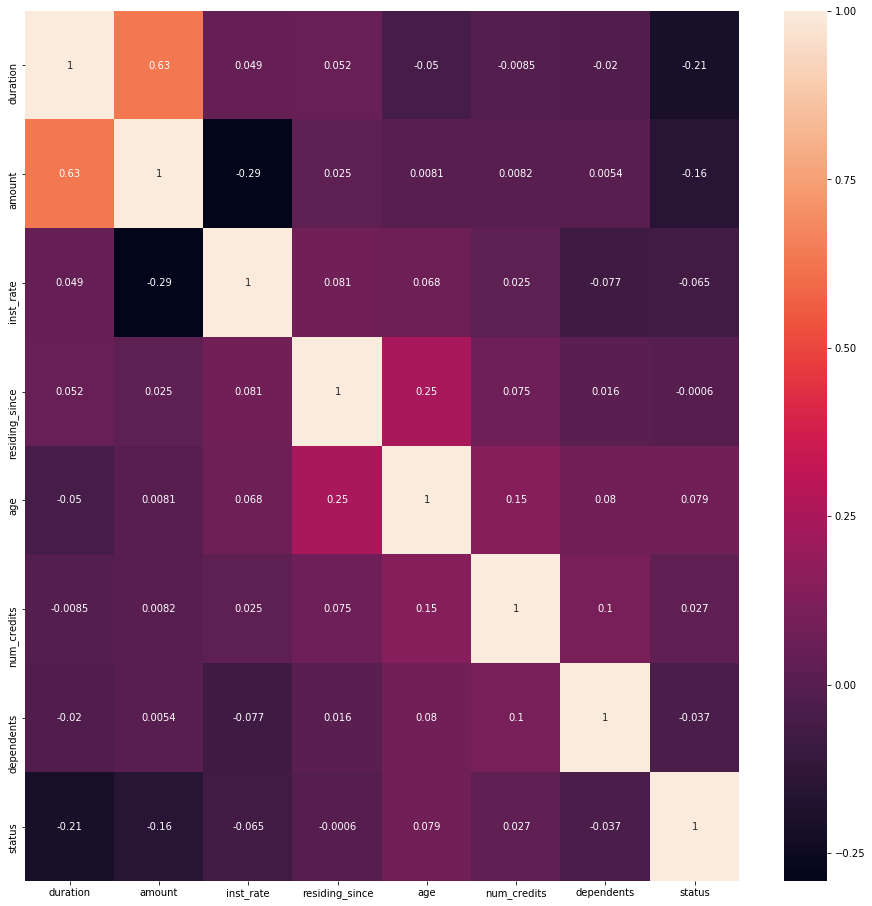

In [7]:
# just numeric variables
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
corr = credit_all_df.corr()
plt.figure(figsize=(16, 16))
sns.heatmap(corr,annot = True,
        xticklabels=corr.columns,
        yticklabels=corr.columns)

## Preprocessing
Convert a number of categorical variables to dummy variables

In [8]:
# convert categorical variables to dummy variables
cat_vars=['checkin_acc','credit_history','purpose','saving_acc','present_emp_since','personal_status','other_debtors',
          'property', 'inst_plans','housing','job', 'telephone', 'foreign_worker']

credit_X_df = pd.get_dummies(credit_X_df, columns = cat_vars)
credit_X_df.head()

,duration,amount,inst_rate,residing_since,age,num_credits,dependents,checkin_acc_A11,checkin_acc_A12,checkin_acc_A13,...,housing_A152,housing_A153,job_A171,job_A172,job_A173,job_A174,telephone_A191,telephone_A192,foreign_worker_A201,foreign_worker_A202
0,24,11938,2,3,39,2,2,0,1,0,...,1,0,0,0,0,1,0,1,1,0
1,36,1819,4,4,37,1,1,0,0,0,...,0,1,0,0,1,0,0,1,1,0
2,15,1478,4,4,44,2,2,1,0,0,...,1,0,0,0,1,0,0,1,1,0
3,24,1516,4,1,43,2,1,0,0,0,...,1,0,0,1,0,0,1,0,1,0
4,9,2136,3,2,25,1,1,1,0,0,...,1,0,0,0,1,0,1,0,1,0


Data is unbalanced, undersampling or oversampling

In [9]:
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(credit_X_df, credit_y_df, test_size=0.3, random_state=0)
X_resampled, y_resampled = RandomUnderSampler(random_state=0).fit_sample(X_train, y_train)
X_resampled, y_resampled = shuffle(X_resampled, y_resampled)

Using TensorFlow backend.


Simple feature selection using correlation threshold

In [10]:
from scipy.stats.stats import pearsonr
relevant_features = []
for i in range(len(X_resampled[0]) - 1): 
    thres = 0.1
    corr = pearsonr(y_resampled.flatten(),X_resampled[:,i])[0]
        
    if abs(corr) > thres:
        relevant_features.append(i)
    
relevant_features

[0, 7, 8, 10, 11, 12, 15, 17, 20, 21, 26, 29, 30, 32, 43, 50, 57, 58]

In [11]:
X_resampled = X_resampled[:,relevant_features]

In [12]:
X_test = X_test.iloc[:,relevant_features]

Normalization

In [13]:
from sklearn.preprocessing import normalize
X_resampled = normalize(X_resampled)
X_test = normalize(X_test)

Use solve.qp to solve for alpha (which is x in the optimization problems)

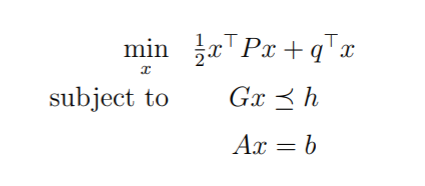

In [15]:
import csv
import numpy as np
import math
import cvxopt as opt
from cvxopt import matrix, solvers

In [18]:
def kernel(XTest, XTrain, type = 0, sigma = 0):
    # Write your code here to return the kernel, type may be 0, 1, 2 for different kernel types
    
    # 0 for polynomial kernel
    # 1 for Gaussian Kernel
    # 2 for Linear Kernel
    
    m1 = XTrain.shape[0]
    m2 = XTest.shape[0]
    
    K = np.zeros((m1, m2))
    
    # Polynomial Kernel
    if type == 0:
        K = (XTest @ XTrain.T + 1)**sigma
           
    # Gaussian Kernel
    if type == 1:
        for i in range(m1):
            for j in range(m2):
                K[i,j] = np.exp(-np.linalg.norm(XTest[i]-XTrain[j])**2 / (2 * (sigma ** 2)))
    
    # Linear Kernel
    else:
        K = XTest @ XTrain.T
    
    return K   

def predict(XTest, XTrain, yTrain, alpha):
    # Write your code here to return the prediction
    
    pred = []
    #support vector calculations
    predictions_ = kernel(XTest, XTrain) @ (alpha * yTrain) + intercept(XTest, XTrain, yTrain, alpha)  
    #prediction values
    pred = np.array(predictions_)
    pred[pred >= 0] = 1
    pred[pred < 0] = -1

    return pred

def intercept(XTest, XTrain, yTrain, alpha):
    # Write your code here to return the intercept
    
    # Extract support vectors
    # Indexes of non-zero lagragian multipiers
    idx = alpha.ravel() > 0
    # Non-zero  lagragian multipliers
    lagr_multipliers = alpha[idx]
    # Support vectors from training data
    support_vectors = XTrain[idx]
    # labels of the support vectors
    support_vector_labels =yTrain[idx]
    
    Ns_value = alpha[alpha>0].shape[0]
    
    # Calculate intercept with first support vector
    b = support_vector_labels[0]
    for i in range(len(lagr_multipliers)):
        b = yTrain - np.sum(lagr_multipliers[i] * support_vector_labels[i] * kernel(support_vectors[i], support_vectors[0]))
        
    b = np.sum(b) / Ns_value
 
    return b


# Linear Kernel
TrainSize = X_resampled.shape[0]
K = kernel(X_resampled, X_resampled)
a0 = np.random.randn(TrainSize)

# Inequality that individual alpha>=0
G = matrix(np.eye(TrainSize))
h = matrix(np.zeros(TrainSize))

# Equality that sum(alpha_i*y_i)=0
A = opt.matrix(np.double(y_resampled))
b = matrix(0.0)

# Change from min to max optimization by multiplying with -1
# Regularization term to force H positive definite
ymat = np.diag(y_resampled.flatten())
P = 0.5 * np.dot(ymat, np.dot(K, ymat)) + 1e-10 * np.identity(TrainSize)
q = opt.matrix(-np.ones((TrainSize,1)))

opts = {'maxiters':100000}
solvers.options['show_progress'] = False 
sol = solvers.qp(matrix(P), q, G, h, A.T, b, initvals = a0, options=opts) # solvers.qp to solve the optimization
alpha = np.array(sol['x'])

     pcost       dcost       gap    pres   dres
 0:  0.0000e+00  0.0000e+00  3e+02  2e+01  0e+00
 1:  0.0000e+00 -4.4409e-16  3e+00  2e-01  1e-16
 2:  1.8165e-16 -6.9389e-18  3e-02  2e-03  1e-16
 3:  1.1021e-18 -5.4210e-20  3e-04  2e-05  0e+00
 4:  1.0950e-20  0.0000e+00  3e-06  2e-07  0e+00
 5:  1.1067e-22  3.3087e-24  3e-08  2e-09  1e-16
Optimal solution found.


In [20]:
pred = predict(X_test, X_resampled, y_resampled, alpha)
print('Accuracy: %f\n' % (np.mean(pred == y_test)*100))

Accuracy: 60.000000



In [21]:
from sklearn import metrics
print('Training Accuracy is: '+ str(np.mean(np.array(pred) == np.array(y_test))*100))
print("testing Accuracy is: ",metrics.accuracy_score(y_test, np.array(pred))*100)
print("Precision: ",metrics.precision_score(y_test, np.array(pred))*100)
print("Recall: ",metrics.recall_score(y_test, np.array(pred))*100)

Training Accuracy is: 60.0
testing Accuracy is:  60.0
Precision:  65.44502617801047
Recall:  87.41258741258741


Confusion Matrix


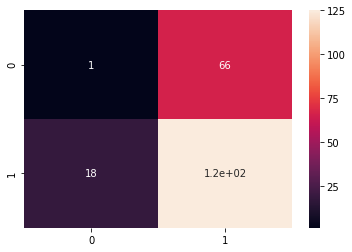

In [22]:
print("Confusion Matrix")

from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt 

cm = confusion_matrix(y_test, np.array(pred))
    

ax= plt.subplot()
sns.heatmap(cm, annot=True, ax = ax);

# Additional Model Scoring

Use your model to score the test dataset in the German Credit Card Application project/contest below. After joining, you can create a team and invite members. Submit your score result to see how it is ranked, and share your write-up/notebook
http://www.scriptedin.com/contests/view/20

(You need to convert categorical variables to dummy variables). You can re-train the model using the training dataset as well if you’d like.

In [23]:
test_feature_df = pd.read_csv(r'D:\MATH 5671\Group 7\Assignment 5\training_features.csv',header =0)
test_feature_df = pd.get_dummies(test_feature_df, columns = cat_vars)
test_feature_df.head()
test_feature_df.head()

,duration,amount,inst_rate,residing_since,age,num_credits,dependents,checkin_acc_A11,checkin_acc_A12,checkin_acc_A13,...,housing_A152,housing_A153,job_A171,job_A172,job_A173,job_A174,telephone_A191,telephone_A192,foreign_worker_A201,foreign_worker_A202
0,24,11938,2,3,39,2,2,0,1,0,...,1,0,0,0,0,1,0,1,1,0
1,36,1819,4,4,37,1,1,0,0,0,...,0,1,0,0,1,0,0,1,1,0
2,15,1478,4,4,44,2,2,1,0,0,...,1,0,0,0,1,0,0,1,1,0
3,24,1516,4,1,43,2,1,0,0,0,...,1,0,0,1,0,0,1,0,1,0
4,9,2136,3,2,25,1,1,1,0,0,...,1,0,0,0,1,0,1,0,1,0


In [24]:
# test_feature_df should have same columns as credit_X_df
test_feature_df = test_feature_df.reindex(columns = credit_X_df.columns, fill_value=0)

In [25]:
test_feature_df = test_feature_df.iloc[:,relevant_features]

In [26]:
test_feature_df = normalize(test_feature_df)
y_test_more_pred = predict(test_feature_df, X_resampled, y_resampled, alpha)

In [27]:
y_test_more_pred= pd.DataFrame(y_test_more_pred)
y_test_more_pred= y_test_more_pred.reset_index()

In [28]:
y_test_more_pred.head()

,index,0
0,0,1.0
1,1,1.0
2,2,1.0
3,3,1.0
4,4,1.0


In [29]:
y_test_more_pred.columns = ['num','label']
y_test_more_pred.head()

,num,label
0,0,1.0
1,1,1.0
2,2,1.0
3,3,1.0
4,4,1.0


In [31]:
y_test_more_pred['num'] = y_test_more_pred['num'] + 1
y_test_more_pred.to_csv(r'D:\MATH 5671\Group 7\Assignment 5\test_submission.csv', index = False)

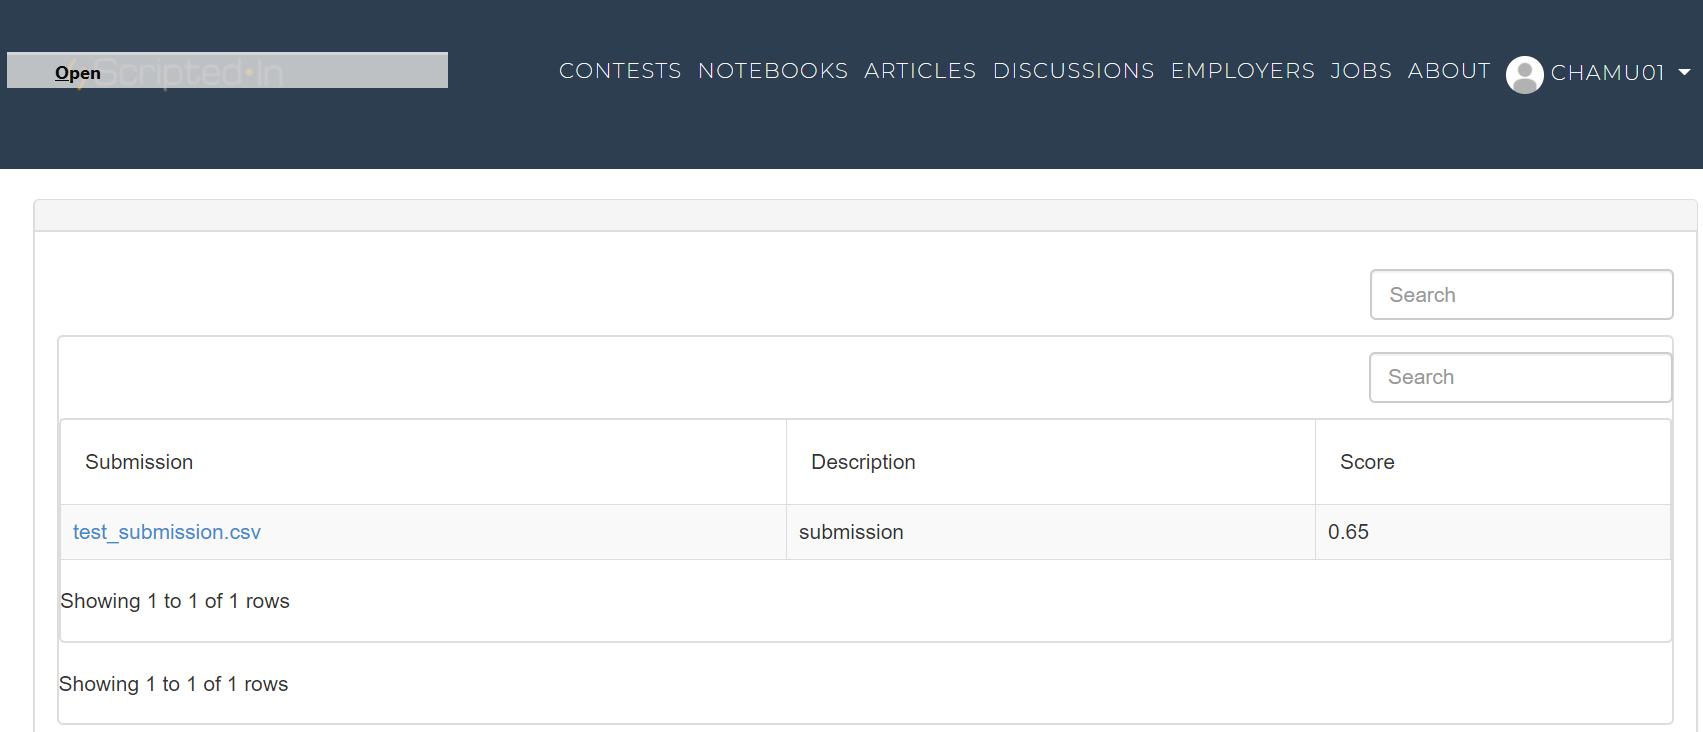